<a href="https://colab.research.google.com/github/aoyerinde/python-learning/blob/master/Pyspark_viaColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Chicago's Reported Crime Data

## Download and install Spark

In [1]:
!ls

sample_data


In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [70.5 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marut

## Setup environment

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2019-09-17 08:38:26--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [             <=>    ]   1.71G  2.70MB/s    in 10m 15s 

2019-09-17 08:48:59 (2.84 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1832658712]



In [5]:
!ls


'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [7]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+------

#Schemas


In [8]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: string (nullable = true)
 |-- Zip Codes: string (nullable = true)
 |-- 

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType


In [10]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'Historical Wards 2003-2015',
 'Zip Codes',
 'Community Areas',
 'Census Tracts',
 'Wards',
 'Boundaries - ZIP Codes',
 'Police Districts',
 'Police Beats']

In [0]:
labels = [
  ('ID', StringType()),
   ('Case Number', StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description', StringType()),
 ('Arrest', StringType()),
 ('Domestic',StringType()),
 ('Beat', StringType()),
 ('District', StringType()),
 ('Ward', StringType()),
 ('Community Area', StringType()),
 ('FBI Code', StringType()),
 ('X Coordinate', StringType()),
 ('Y Coordinate', StringType()),
 ('Year', IntegerType()),
 ('Updated On', StringType()),
 ('Latitude', DoubleType()),
 ('Longitude', DoubleType()),
 ('Location', StringType()),
 ('Historical Wards 2003-2015', StringType()),
('Zip Codes',StringType()),
 ('Community Areas', StringType()),
 ('Census Tracts', StringType()),
 ('Wards', StringType()),
 ('Boundaries - ZIP Codes', StringType()),
('Police Districts', StringType()),
 ('Police Beats', StringType())]

In [12]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema 

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,StringType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true),StructField(Historical Wards 2003-2015,StringType,true),StructField(Zip Codes,StringType,true),StructField(Community Areas,StringType,tr

In [13]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+------

# Working with Columns 


In [14]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [15]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0820|
|0910|
|1320|
|1310|
|0580|
+----+
only showing top 5 rows



In [16]:
rc.select(rc.IUCR).show(5)
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0820|
|0910|
|1320|
|1310|
|0580|
+----+
only showing top 5 rows

+----+
|IUCR|
+----+
|0820|
|0910|
|1320|
|1310|
|0580|
+----+
only showing top 5 rows



In [17]:
rc.select('IUCR', 'Case Number','Arrest').show(5)

+----+-----------+------+
|IUCR|Case Number|Arrest|
+----+-----------+------+
|0820|   JB512058| false|
|0910|   JB511504| false|
|1320|   JB511795| false|
|1310|   JB511536| false|
|0580|   JB511539| false|
+----+-----------+------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import lit 

In [19]:
rc.withColumn('One', lit(1)).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+---+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|One|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+------

In [20]:
rc.drop('IUCR')
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+------

#Working with Rows


In [21]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [22]:
rc.union(one_day).orderBy('Date', ascending = False).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+---

In [23]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418374|
|            BATTERY|1232194|
|    CRIMINAL DAMAGE| 771495|
|          NARCOTICS| 711535|
|      OTHER OFFENSE| 418767|
|            ASSAULT| 418500|
|           BURGLARY| 388026|
|MOTOR VEHICLE THEFT| 314145|
| DECEPTIVE PRACTICE| 264702|
|            ROBBERY| 255600|
+-------------------+-------+
only showing top 10 rows



In [24]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [25]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: string (nullable = true)
 |-- Zip Codes: string (nullable = true)
 |-- 

In [26]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()

0.27752500131827557

In [27]:
rc.groupBy('Location Description').count().orderBy('count', ascending =False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770550|
|           RESIDENCE|1144085|
|           APARTMENT| 697921|
+--------------------+-------+
only showing top 3 rows



In [0]:
from pyspark.sql import  functions

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [30]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [31]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|              theft|              THEFT|                         THEF|
|motor vehicle theft|MOTOR VEHICLE THEFT|                         MOTO|
|    criminal damage|    CRIMINAL DAMAGE|                         CRIM|
|    criminal damage|    CRIMINAL DAMAGE|                         CRIM|
|           stalking|           STALKING|                         STAL|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import min, max

In [33]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [0]:
from pyspark.sql.functions import date_add, date_sub

In [35]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



In [37]:
nrc = spark.read.csv('reported-crimes.csv', header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+---------------------+----+-----------------+---------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type     |Description                |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+----------------------+---------------------+----+-----------------+---------------------------+----------

In [39]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [45]:
!wget police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls

--2019-09-17 13:40:45--  http://police-station.csv/
Resolving police-station.csv (police-station.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘police-station.csv’
--2019-09-17 13:40:45--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [ <=>                ]   6.14K  --.-KB/s    in 0s      

2019-09-17 13:40:46 (773 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [6284]

FINISHED --2019-09-17 13:40:46--
Total wall clock time: 0.5s
Downloaded: 1 files, 6.1K in 0s (773 MB/s)
 reported-crimes.csv		   spark-2.3.1-bin-hadoop2.7
'rows.csv?accessType=DOWNLOAD'	   spark-2.3.1-bin-hadoop

In [0]:
!mv rows.csv\?accessType\=DOWNLOAD.1 police-station.csv

In [68]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+----------------------+---------------+---------+-------------+-----+---------------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Boundaries - ZIP Codes|Community Areas|Zip Codes|Census Tracts|Wards|:@computed_region_awaf_s7ux|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+----------------------+---------------+---------+-------------+-----+---------------------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4

In [69]:
rc.cache
rc.count()

6751244

In [53]:
ps.select(col('DISTRICT')).distinct().show()

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [54]:
rc.select(col('district')).distinct().show(30)

+--------+
|district|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [70]:
from pyspark.sql.functions import lpad
ps.select(lpad(col('DISTRICT'),3,'0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 001|
|                 006|
|                 011|
|                 016|
|                 Hea|
+--------------------+
only showing top 5 rows



In [0]:
ps = ps.withColumn('format_district', lpad(col('DISTRICT'),3,'0'))

In [72]:
rc.join(ps, rc.District == ps.format_district, 'left_outer').show(4)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+--------+-------------+-----------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+----------------------+---------------+---------+-------------+-----+---------------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|H

In [74]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Boundaries - ZIP Codes',
 'Community Areas',
 'Zip Codes',
 'Census Tracts',
 'Wards',
 ':@computed_region_awaf_s7ux',
 'format_district']

In [75]:
rc.join(ps, rc.District == ps.format_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Boundaries - ZIP Codes',
 'Community Areas',
 'Zip Codes',
 'Census Tracts',
 'Wards',
 ':@computed_region_awaf_s7ux').show(10)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------------------------+----------------+------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|Historical Wards 2003-2015|Police Districts|Police Beats|DISTRICT|DISTRICT NAME|format_district|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------------------------+----------------+------------+--------+-------------+---------------+
|11504330|   JB512058|2018-11-10 23:55:00|021XX W GREENLEAF...|0

In [76]:
rc.cache()
rc.count()

6751244

In [77]:
rc.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+

In [79]:
rc.select(col('Primary Type')).distinct().count()

35

In [82]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(35, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION   

In [0]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == '|NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [84]:
nc.show(100)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+

In [85]:
nc.groupby(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [0]:
from pyspark.sql.functions import dayofweek
from pyspark.sql.functions import date_format

In [87]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2018-11-10 23:55:00|              7|
|2018-11-10 23:53:00|              7|
|2018-11-10 23:50:00|              7|
|2018-11-10 23:45:00|              7|
|2018-11-10 23:42:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [89]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2018-11-10 23:55:00|              7|                 Sat|
|2018-11-10 23:53:00|              7|                 Sat|
|2018-11-10 23:50:00|              7|                 Sat|
|2018-11-10 23:45:00|              7|                 Sat|
|2018-11-10 23:42:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [91]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', acsending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Sun| 911684|
|                 Mon| 952427|
|                 Thu| 964242|
|                 Sat| 964918|
|                 Tue| 967746|
|                 Wed| 973579|
|                 Fri|1016648|
+--------------------+-------+



In [92]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911684),
 Row(date_format(Date, E)='Mon', count=952427),
 Row(date_format(Date, E)='Thu', count=964242),
 Row(date_format(Date, E)='Sat', count=964918),
 Row(date_format(Date, E)='Wed', count=973579),
 Row(date_format(Date, E)='Fri', count=1016648),
 Row(date_format(Date, E)='Tue', count=967746)]

In [94]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [95]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[911684, 952427, 964242, 964918, 973579, 1016648, 967746]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
cp = pd.DataFrame({'Day of week': dow, 'Count':cnt})
cp.head(7)

,Day of week,Count
0,Sun,911684
1,Mon,952427
2,Thu,964242
3,Sat,964918
4,Wed,973579
5,Fri,1016648
6,Tue,967746


Text(0.5, 1.0, 'No of reported Crimes per day of week')

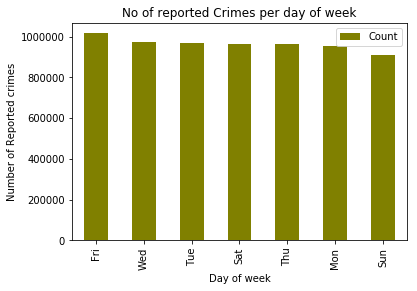

In [103]:
cp.sort_values('Count', ascending=False).plot(kind='bar',color='olive' ,x='Day of week', y='Count')
plt.xlabel('Day of week')
plt.ylabel('Number of Reported crimes')
plt.title('No of reported Crimes per day of week')